## 1. Setting

In [1]:
import os
PROJECT_PATH = "./.."
os.chdir(project_path)

import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt

from lib.config import *
import lib.inputManager as IM
import lib.userManager as UM
import lib.stationManager as SM
import lib.statistic as STAT
import lib.jeju as JEJU
from lib.jeju import *

## 2. Data loading

In [2]:
# 데이터 기간 설정
start_date = datetime.datetime(2019, 6, 1)
end_date = datetime.datetime(2019, 8, 29)

# 로딩할 파일 명 리스트 생성
input_path_list = IM.make_input_path(start_date, end_date)

# 전체 데이터 로딩 (multi)
usage_df = IM.parallel_load_total_usage_df(input_path_list)

station_df = pd.read_csv(STATION_DF_PATH, encoding = DEFAULT_ENCODING)
user_df = pd.read_csv(USER_DF_PATH, encoding = DEFAULT_ENCODING)

## 3. Station

#### 3.1 Station list

In [3]:
station_df

,station_id,station_name,station_longitude,station_latitude,station_address,total_geton,total_getoff,airport_flag,harbor_flag,tour_station_flag,tourist_geton_count,tourist_getoff_count
0,988.0,납읍리사무소,126.32944,33.43944,제주특별자치도 제주시 애월읍 납읍리 1754-3,3209.0,527.0,False,False,False,29.0,1.0
1,26.0,하귀초등학교,126.40212,33.48017,제주특별자치도 제주시 애월읍 하귀2리 1908-2,26344.0,12598.0,False,False,False,1043.0,748.0
2,3271.0,제주시청(광양방면),126.53035,33.49892,제주특별자치도 제주시 이도이동 1938-1,243695.0,145122.0,False,False,False,5187.0,3689.0
3,342.0,삼무공원,126.49240,33.48980,제주특별자치도 제주시 연동 281,14776.0,5635.0,False,False,False,3605.0,409.0
4,638.0,제주국제공항(구제주방면),126.49345,33.50661,제주특별자치도 제주시 용담이동 1462-1,142233.0,55880.0,True,False,False,19307.0,8281.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3649,2213.0,수산1리비석거리,126.88861,33.44354,제주특별자치도 서귀포시 성산읍 수산리 269,False,False,False,False,False,0.0,0.0
3650,2972.0,제주국제공항(종점),126.49356,33.50572,제주특별자치도 제주시 용담이동 1462,7566.0,742.0,True,False,False,936.0,25326.0
3651,2279.0,하모3리축협,126.25240,33.22531,제주특별자치도 서귀포시 대정읍 하모리 1423-20,678.0,389.0,False,False,False,333.0,514.0
3652,3350.0,"제주국제공항(평화로,800번)",126.49272,33.50636,제주특별자치도 제주시 용담이동 2002,1551.0,1740.0,True,False,False,2495.0,104.0


#### 3.2 Station analysis

In [4]:
SM.show_station_analyze(station_df)

전체 정류장 수:  3654 개
공항 정류장 수:  9 개
항만 정류장 수:  7 개
관광 정류장 수:  485 개


## 4. User

#### 4.1 User list

In [5]:
user_df

,user_id,first_date,last_date,use_days,period,usage,usage_ratio,first,last,case,airport_count,harbor_count,access_count,tour_count,tourist
0,f6f372cf8c6732eafc2a82b4f9d7a08bb3b493213ea4ef...,2019-06-01,2019-06-09,5,9,14,55,other,other,neither,1,0,1,2,False
1,3f6cfe2429f6e8d62cddc39222993405789b7b9ea2a592...,2019-06-01,2019-08-28,26,89,59,29,other,other,neither,1,0,1,4,False
2,107cd874732b48a35df957bf653751154b0234e5573ba5...,2019-06-01,2019-08-28,63,89,249,70,other,other,neither,0,0,0,2,False
3,27b16001fafd812b1e5c474cbc60455a9286ad27ecf8e5...,2019-06-01,2019-08-28,47,89,83,52,other,other,neither,0,0,0,4,False
4,89c9a1c6e5915df4c192acc54067ee9a743f44eb559f3b...,2019-06-01,2019-08-28,26,89,35,29,other,other,neither,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726187,1c0b23153f52f11215e7d1f4e45dcecfa6d669676c4a9f...,2019-08-28,2019-08-28,1,1,1,100,other,other,neither,0,0,0,0,False
726188,8235b6d43ba2e06d89fe94fda0dfdb7b4fe678ac58eaf5...,2019-08-28,2019-08-28,1,1,1,100,other,other,neither,0,0,0,0,False
726189,f6f259fe96fd2e245be452a154c7c43ac747bc0f5d5ad1...,2019-08-29,2019-08-29,1,1,1,100,other,no_tag,neither,0,0,0,0,False
726190,670048e0bb0ed87661ef4e33fe476d74e4616c137bcdb0...,2019-08-29,2019-08-29,1,1,1,100,other,other,neither,0,0,0,0,False


#### 4.2 User analysis

In [6]:
UM.show_user_analyze(user_df)

* Total 
  - User   : 726192 people
  - Tourist: 85929 people
  - Ratio  : 11.8%


* both
  - User   : 47629 people
  - Tourist: 31222 people
  - Ratio  : 65.6%


* first
  - User   : 131112 people
  - Tourist: 22743 people
  - Ratio  : 17.3%


* last
  - User   : 55006 people
  - Tourist: 10303 people
  - Ratio  : 18.7%


* neither
  - User   : 492445 people
  - Tourist: 21661 people
  - Ratio  : 4.4%


* airport user: 310758 people
* harbor user :   4785 people


## 5. Tourist

## 5.1 Tourist list

In [7]:
user_df[user_df["tourist"]]

,user_id,first_date,last_date,use_days,period,usage,usage_ratio,first,last,case,airport_count,harbor_count,access_count,tour_count,tourist
126,5152f3df23bb3728087ef3881d9dd3b6840b8ff31d5502...,2019-06-01,2019-06-02,2,2,12,100,other,airport,last,1,0,1,8,True
127,cc36083258e3ec4f06af593c71d5e080159fa085a3b6f5...,2019-06-01,2019-06-02,2,2,12,100,other,airport,last,1,0,1,8,True
129,60126bd03aab52274cd4e09f6432ab960d49545a699ef3...,2019-06-01,2019-06-03,2,3,9,66,airport,airport,both,2,0,2,6,True
133,829dd9199c6c95754aef55cd35d4b57440627d7e5f0274...,2019-06-01,2019-06-04,4,4,11,100,other,airport,last,1,0,1,6,True
134,d74ca5813fd06612d8103468c149b4e4ee092113e74af9...,2019-06-01,2019-06-04,4,4,11,100,other,airport,last,1,0,1,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719933,bac59e75361268df6cedaf51c912c631fae690e48fac53...,2019-08-27,2019-08-28,2,2,5,100,other,other,neither,1,0,1,5,True
719934,2046b10db0c79ede5c6a9998c3d8faed7eb63e2b186b0a...,2019-08-27,2019-08-28,2,2,5,100,other,other,neither,1,0,1,5,True
720005,6bbf49c3a878b194c6fe349ba3e3cb5456a799c2d7fb24...,2019-08-27,2019-08-28,2,2,2,100,airport,airport,both,2,0,2,2,True
720006,d8ada7f63d9ef7b8620af789b25f74c6a866f9a72d921f...,2019-08-27,2019-08-28,2,2,2,100,airport,other,first,1,0,1,3,True


#### 5.2 Num of tourist per stay period

<module 'matplotlib.pyplot' from 'C:\\Users\\hooni\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

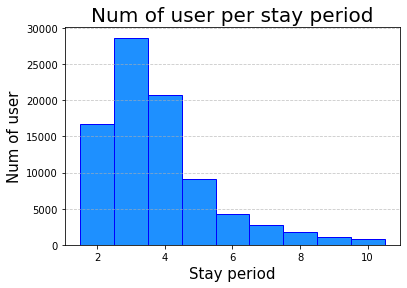

In [8]:
def draw_period_user(plt, user_df, title=""):
    data = user_df['period'].value_counts().reset_index().sort_values('index')
    data_x = data['index']
    data_y = data['period']
    
    plt.grid(True, axis='y', linestyle="--", alpha = 0.7)
    plt.bar(data_x, data_y, width=1, color = "dodgerblue", edgecolor="b")
    if title == "":
        plt.title('Num of user per stay period', fontsize=20)
    else:
        plt.title(title, fontsize=30)
    plt.xlabel('Stay period', fontsize = 15)
    plt.ylabel('Num of user', fontsize = 15)
    return plt

df = user_df[user_df["tourist"] == True]
draw_period_user(plt, df)

#### 5.3 Both type tourist

In [9]:
def show_od_pattern(user_df, usage_df, num):
    id = user_df.iloc[num, 0]
    print("id = %s"%id)
    select = ["base_date", "geton_datetime", "geton_stataion_name", "getoff_datetime", "getoff_station_name"]
    od_df = usage_df.query('user_id == "{}"'.format(id)).sort_values('geton_datetime')
    return od_df[select]

df = user_df[user_df["tourist"] & (user_df["case"] == "both")]
show_od_pattern(df, usage_df, 100)

id = a9e2c88623fed9140eb78b2f0777dfac4d88d7b26f70656ef673822347ca8f65


,base_date,geton_datetime,geton_stataion_name,getoff_datetime,getoff_station_name
82469,20190601,2019-06-01 14:49:40,"제주국제공항(대정,화순,일주서로)",2019-06-01 15:05:25,월랑마을남녕고등학교
82470,20190601,2019-06-01 15:18:53,원노형,2019-06-01 15:36:34,제주도립미술관
82471,20190601,2019-06-01 17:43:16,제주도립미술관입구,2019-06-01 18:31:08,탐라장애인종합복지관
216128,20190602,2019-06-02 06:34:42,제주버스터미널,2019-06-02 06:42:58,제주국제공항(신제주방면)


#### 5.4 First type tourist

In [10]:
df = user_df[user_df["tourist"] & (user_df["case"] == "first")]
show_od_pattern(df, usage_df, 100)

id = 0b9966bf7cd3f42fe557441d1746d772145b608aecc20b1726a9fe5e0785efe7


,base_date,geton_datetime,geton_stataion_name,getoff_datetime,getoff_station_name
77451,20190601,2019-06-01 07:39:23,"제주국제공항(평화로,800번)",2019-06-01 07:55:50,연동365의원
77450,20190601,2019-06-01 13:23:28,제원아파트,2019-06-01 13:40:42,한국병원
77453,20190601,2019-06-01 13:52:59,한국병원,2019-06-01 14:54:17,월정리
77452,20190601,2019-06-01 18:07:27,월정리용천동,2019-06-01 19:11:07,제주버스터미널(종점)
77449,20190601,2019-06-01 19:40:46,제주버스터미널,2019-06-01 19:51:00,삼무공원
132567,20190602,2019-06-02 08:16:38,도호동,2019-06-02 08:27:51,제주버스터미널
132566,20190602,2019-06-02 08:45:06,제주버스터미널,2019-06-02 09:49:53,성산항
132568,20190602,2019-06-02 17:19:07,성산리,2019-06-02 19:02:01,제주버스터미널(종점)
132569,20190602,2019-06-02 19:33:22,제주버스터미널,2019-06-02 19:45:07,연동주민센터
244334,20190603,2019-06-03 10:00:00,신제주초등학교,NaT,NaN


#### 5.5 Last type tourist

In [11]:
df = user_df[user_df["tourist"] & (user_df["case"] == "last")]
show_od_pattern(df, usage_df, 100)

id = d78f86c32ddf4135994c4aaa73ba4169f063b7bf6f79a65c1d5a62576e4565dc


,base_date,geton_datetime,geton_stataion_name,getoff_datetime,getoff_station_name
18370,20190601,2019-06-01 13:21:10,월정리,NaT,NaN
355412,20190603,2019-06-03 14:41:41,제주국제공항,2019-06-03 15:51:29,성산환승정류장(고성리회전교차로)
556563,20190604,2019-06-04 12:39:51,고성리구성산농협,2019-06-04 13:58:32,제주버스터미널(종점)
556562,20190604,2019-06-04 14:27:19,제주버스터미널,NaT,NaN
611355,20190605,2019-06-05 16:08:57,제주시청(광양방면),NaT,NaN
611356,20190605,2019-06-05 17:17:30,제주중학교/제주향교,NaT,NaN
611354,20190605,2019-06-05 19:59:46,북촌리해동,NaT,NaN
960691,20190607,2019-06-07 11:41:32,구좌중앙초등학교,2019-06-07 11:43:54,월정리
960690,20190607,2019-06-07 11:46:11,김녕환승정류장(김녕초등학교),2019-06-07 12:46:44,제주국제공항(종점)


#### 5.6 Neither type tourist

In [12]:
df = user_df[user_df["tourist"] & (user_df["case"] == "neither")]
show_od_pattern(df, usage_df, 3)

id = d6b3bc2a0df0119d05cca64707bb47763094737632abd4f35ba46acc09130a8e


,base_date,geton_datetime,geton_stataion_name,getoff_datetime,getoff_station_name
673,20190601,2019-06-01 09:12:11,(구)중문동주민센터,2019-06-01 09:34:16,서귀포시구시외버스터미널
674,20190601,2019-06-01 10:10:23,중앙로터리(동),2019-06-01 10:23:20,돈내코
672,20190601,2019-06-01 12:23:16,서귀포산업과학고등학교,2019-06-01 12:29:45,한라산둘레길
675,20190601,2019-06-01 17:43:51,충혼묘지광장,2019-06-01 18:26:35,중앙로터리
671,20190601,2019-06-01 18:31:24,중앙로터리,2019-06-01 19:02:13,중문초등학교
199886,20190602,2019-06-02 08:53:18,(구)중문동주민센터,2019-06-02 09:58:01,남원포구입구
199885,20190602,2019-06-02 10:05:14,남원포구입구,NaT,NaN
199887,20190602,2019-06-02 17:36:42,사농동산,2019-06-02 17:51:05,남원1리사무소
199888,20190602,2019-06-02 17:52:46,남원1리사무소,2019-06-02 18:58:01,(구)중문동주민센터
355131,20190603,2019-06-03 09:04:31,(구)중문동주민센터,2019-06-03 09:31:27,화순환승정류장(안덕농협)


## 6. Compare

#### 6.1 Result of original alogorithm

In [14]:
def original_algorithm(df):
    df = df.copy()
    df = df[user_df["period"]>=2][df["period"]<=10]
    df["count"] = df["tour_count"]+df["airport_count"]+df["harbor_count"]
    df = df[df["count"]>=3]
    return df

df = original_algorithm(user_df)
total = len(df)
print("tourist num:%s"%total)
print("tourist ration:%s"%(total/len(user_df)))

original_df = df[["case", "access_count", "user_id"]].groupby(by=["case", "access_count"]).count()
original_df

tourist num:109854
tourist ration:0.15127404322823715


<ipython-input-14-1a405d086957>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[user_df["period"]>=2][df["period"]<=10]


user_id
case    access_count         
both    1                1644
        2               25950
        3                2298
        4                 914
        5                  90
        6                   9
        7                   2
first   1               26561
        2                3023
        3                1444
        4                 241
        5                  56
        6                  12
last    1               11386
        2                1964
        3                 764
        4                 139
        5                  39
        6                   4
neither 0               26296
        1                3125
        2                3299
        3                 418
        4                 139
        5                  27
        6                  10

#### 6.2 Origin & Enhanced

In [15]:
df = original_algorithm(user_df)
total = len(df)
df = df[df["tourist"]]
print("tourist num:%s"%len(df))
print("tourist ratio:%s"%(len(df)/total))

common_df = df[["case", "tour_count", "user_id"]].groupby(by=["case", "tour_count"]).count()
common_df

tourist num:85460
tourist ratio:0.7779416316201504


<ipython-input-14-1a405d086957>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[user_df["period"]>=2][df["period"]<=10]


user_id
case    tour_count         
both    1              4630
        2              7672
        3              3964
        4              3282
        5              2677
...                     ...
neither 24                3
        25                3
        26                3
        27                3
        29                1

[113 rows x 1 columns]

#### 6.3 Origin - Enhanced

In [16]:
df = original_algorithm(user_df)
total = len(df)
df = df[df["tourist"] == False]
print("tourist num:%s"%len(df))
print("tourist ratio:%s"%(len(df)/total))

only_original_df = df[["case", "tour_count", "user_id"]].groupby(by=["case", "tour_count"]).count()
only_original_df

tourist num:24394
tourist ratio:0.22205836837984963


<ipython-input-14-1a405d086957>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[user_df["period"]>=2][df["period"]<=10]


user_id
case    tour_count         
both    0               154
first   0                73
        1               559
        2              7962
last    0                41
        1               466
        2              3486
neither 0                38
        1               585
        2              2355
        3              8675

#### 6.4 Enhanced - Origin

In [17]:
df = user_df.copy()
original_df = original_algorithm(user_df)
improved_df = df[df["tourist"] == True]
original_id_df = original_df[["user_id"]]
original_id_df["flag"] = original_id_df["user_id"]
df = pd.merge(improved_df, original_id_df, on="user_id", how="left")
df = df[df["flag"].isna()]

print("tourist num:%s"%len(df))
print("tourist ration:%s"%(len(df)/total))
only_improved_df = df[["case", "tour_count", "user_id"]].groupby(by=["case", "tour_count"]).count()
only_improved_df

<ipython-input-14-1a405d086957>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[user_df["period"]>=2][df["period"]<=10]
<ipython-input-17-2ffad5cfd4bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_id_df["flag"] = original_id_df["user_id"]


tourist num:469
tourist ration:0.004269302892930617


,,user_id
case,tour_count,
both,1,469


In [18]:
df1 = common_df.rename(columns={"user_id":"original&improved"}).reset_index()
df2 = only_original_df.rename(columns={"user_id":"only_original"}).reset_index()
df3 = only_improved_df.rename(columns={"user_id":"only_improved"}).reset_index()

merged_df = pd.merge(df1, df2, how="outer")
merged_df = pd.merge(merged_df, df3, how="outer")
merged_df = merged_df.fillna(0)
merged_df["only_original"] = merged_df["only_original"].apply(lambda x : int(x))
merged_df["only_improved"] = merged_df["only_improved"].apply(lambda x : int(x))


In [19]:
df = merged_df
df = df[df["case"] == "both"].sort_values(by="tour_count")
# df = df[df["tour_count"]>3]
# df["original&improved"].sum()
df

,case,tour_count,original&improved,only_original,only_improved
113,both,0,0.0,154,0
0,both,1,4630.0,0,469
1,both,2,7672.0,0,0
2,both,3,3964.0,0,0
3,both,4,3282.0,0,0
4,both,5,2677.0,0,0
5,both,6,2101.0,0,0
6,both,7,1674.0,0,0
7,both,8,1271.0,0,0
8,both,9,920.0,0,0


## 7. Exception

#### 7.1 Exception1

In [20]:
df = original_algorithm(user_df)
df = df[df["case"] == "neither"]
df = df[df["tourist"] == False]
df = df[df["access_count"]>=3]
df = df[df["tour_count"]<3]
# df = df[df["harbor_count"]<1]
df
show_od_pattern(df, usage_df, 7)

<ipython-input-14-1a405d086957>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[user_df["period"]>=2][df["period"]<=10]


id = fbbe8550d77d48fc98625fbf0bb40897147243982441cecaa28b4b2ca9a2aaec


,base_date,geton_datetime,geton_stataion_name,getoff_datetime,getoff_station_name
130117,20190601,2019-06-01 17:03:21,성산환승정류장(고성리회전교차로),2019-06-01 18:34:02,제주국제공항(종점)
222893,20190602,2019-06-02 20:55:51,제주국제공항,2019-06-02 22:01:29,성산환승정류장(고성리회전교차로)
1241341,20190609,2019-06-09 20:34:22,"제주국제공항(일주동로,516도로)",2019-06-09 21:57:47,성산환승정류장(고성리한국물류)


#### 7.2 Exception2

In [21]:
df = original_algorithm(user_df)
df = df[df["case"] == "neither"]
df = df[df["tourist"] == False]
df = df[df["tour_count"]==3]
show_od_pattern(df, usage_df, 163)

<ipython-input-14-1a405d086957>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[user_df["period"]>=2][df["period"]<=10]


id = 66d437297a062216dd9b77e19ef0fb4386af0f46cd8952bb86f36f70da2d1d85


,base_date,geton_datetime,geton_stataion_name,getoff_datetime,getoff_station_name
90770,20190601,2019-06-01 16:33:43,시외버스출발지(가상정류소),2019-06-01 18:26:56,제주민속촌
90769,20190601,2019-06-01 18:33:33,표선환승정류장(표선면사무소),NaT,NaN
287077,20190603,2019-06-03 06:46:23,삼달1리삼거리,2019-06-03 06:58:48,표선환승정류장(표선면사무소)
287076,20190603,2019-06-03 07:12:51,표선환승정류장(표선면사무소),NaT,NaN
